<a href="https://colab.research.google.com/github/chinu1997/Capstone-4-Team-3-/blob/main/Chinmaya_Devprasad_of_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import string
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import gensim.corpora as corpora
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install pyLDAvis

In [ ]:
News=[]
Type=[]
path="/content/drive/MyDrive/Almabetter/Cohort Aravali/Module 4/Capstone-4/Topic Modeling on BBC News Articles/bbc"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)

data={'news':News,'type':Type}
df = pd.DataFrame(data)

In [ ]:
df.head()

,news,type
0,b'Mixed signals from French economy\n\nThe Fre...,business
1,b'US trade gap hits record in 2004\n\nThe gap ...,business
2,b'Indonesians face fuel price rise\n\nIndonesi...,business
3,b'High fuel prices hit BA\'s profits\n\nBritis...,business
4,b'Sluggish economy hits German jobs\n\nThe num...,business


In [ ]:
df.shape

(2225, 2)

Text(0.5, 1.0, 'Type Of news Counts')

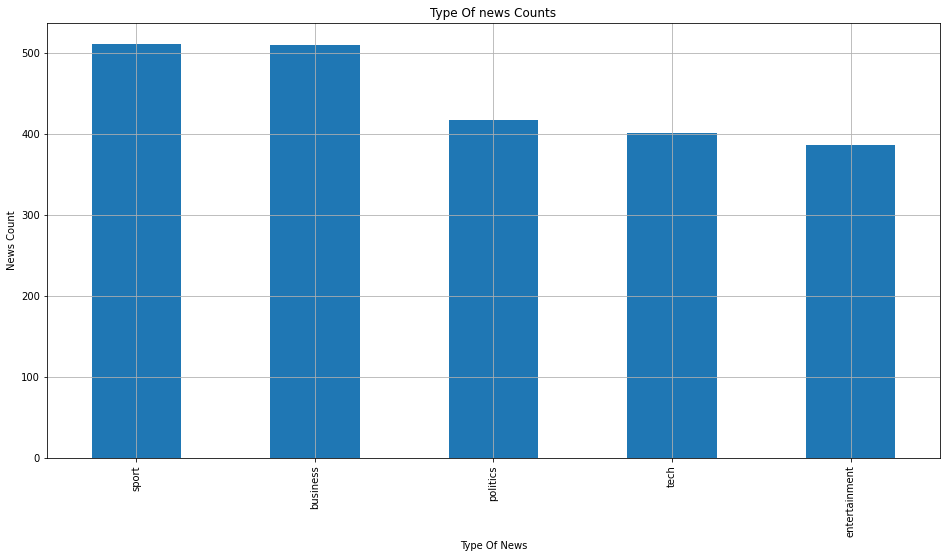

In [ ]:
plt.figure(figsize=(16,8))
df['type'].value_counts().plot(kind='bar',grid=True)
plt.xlabel("Type Of News")
plt.ylabel("News Count")
plt.title("Type Of news Counts")

In [ ]:
df['news'][0]

b'Mixed signals from French economy\n\nThe French economy picked up speed at the end of 2004, official figures show - but still looks set to have fallen short of the government\'s hopes.\n\nAccording to state statistics body INSEE, growth for the three months to December was a seasonally-adjusted 0.7-0.8%, ahead of the 0.6% forecast. If confirmed, that would be the best quarterly showing since early 2002. It leaves GDP up 2.3% for the full year, but short of the 2.5% which the French government had predicted.\n\nDespite the apparent shortfall in annual economic growth, the good quarterly figures - a so-called "flash estimate" - mark a continuing trend of improving indicators for the health of the French economy. The government is reiterating a 2.5% target for 2005, while the European Central Bank is making positive noises for the 12-nation eurozone as a whole. Also on Friday, France\'s industrial output for December was released, showing 0.7% growth. "The numbers are good," said David 

In [ ]:
df['news'] = df['news'].astype('str') 

In [ ]:
stop_list=list(stopwords.words('english'))
stop_list.append('would')
stop_list.append('could')


In [ ]:
def Change_text(msg):
  punc=[char for char in msg if str(char) not in string.punctuation]
  no_punc=''.join(punc)
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

In [ ]:

def lemmatization(texts):
  sentence=''
  allowed_postags=['NOUN','ADJ','VERB','ADV']
  texts_out=[]
  doc=nlp(texts)
  texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
  return ' '.join(texts_out[0])

In [ ]:
df['news']=df['news'].apply(Change_text)

In [ ]:
nlp=spacy.load('en',disable=['parser', 'ner'])
df['news']=df['news'].apply(lemmatization)

In [ ]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

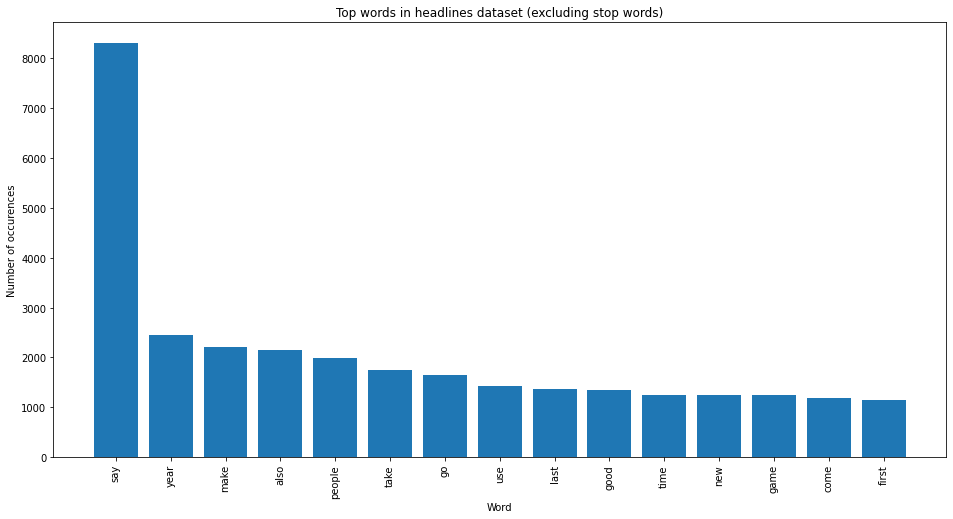

In [ ]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

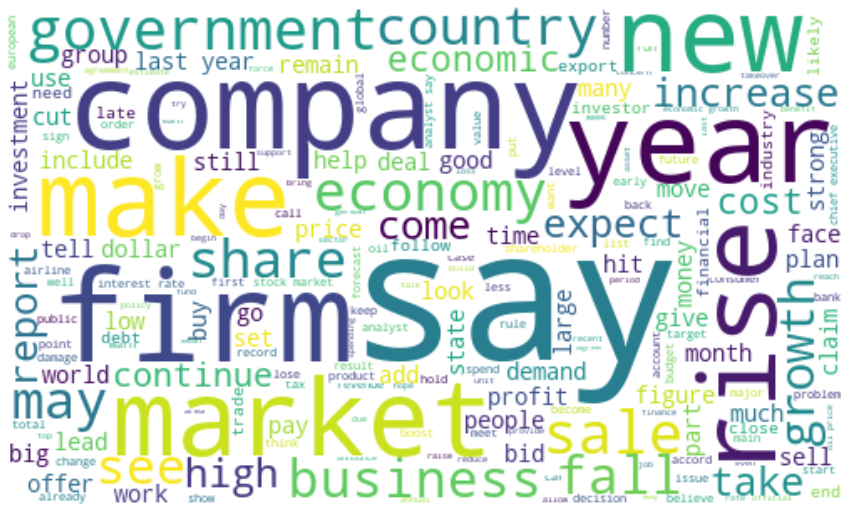

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in df[df['type']=='business']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="white", random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

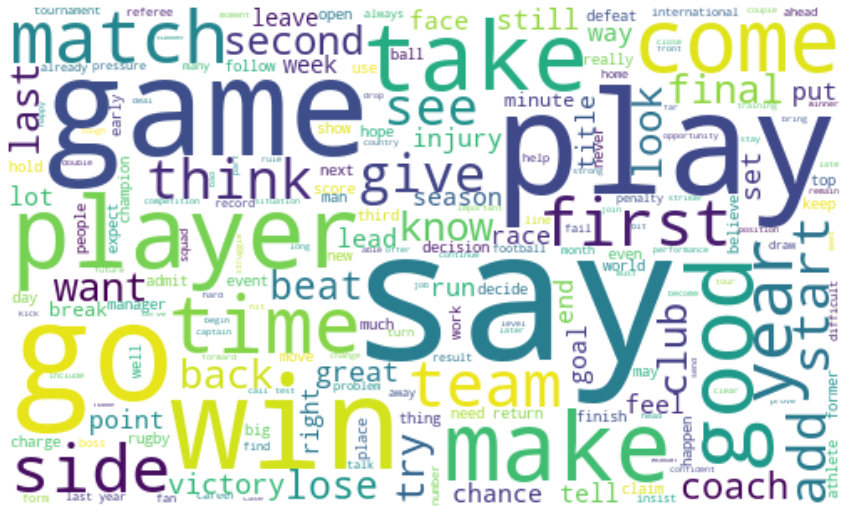

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in df[df['type']=='sport']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="white", random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=5000,min_df=0.05)

In [ ]:
matrix=vectorizer.fit_transform(df['news'])

In [ ]:
df1 = pd.DataFrame(matrix.todense() , columns=vectorizer.get_feature_names())

In [ ]:
df1.head()

,able,accept,access,accord,account,accuse,action,add,admit,age,ago,agree,ahead,aim,allow,almost,already,also,always,amount,analyst,announce,annual,appear,area,argue,ask,attack,attempt,available,award,away,back,bad,base,battle,beat,become,begin,believe,...,think,third,time,title,today,together,top,total,tough,trade,trial,try,turn,tv,understand,use,user,value,version,victory,video,view,vote,want,warn,watch,way,website,week,well,whole,win,winner,woman,work,world,write,year,yet,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126375,0.0,0.000000,0.0,0.000000,0.059304,0.0,0.0,0.000000,0.0,0.147625,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.093610,0.0,0.0,0.00000,0.144646,0.0,0.0,0.0,0.000000,0.000000,0.0,0.059970,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083516,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.107495,0.0,0.00000,0.000000,0.0,0.0,0.0,0.072375,0.0,0.0,0.0,0.0,0.0,0.000000,0.078652,...,0.0,0.000000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.317955,0.0,0.000000,0.085953,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.070389,0.0,0.131823,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.033800,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.083614,0.0,0.00000,0.081639,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0435,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.059994,0.000000,0.0,0.0,0.048215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099115,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.068359,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088265,0.0,0.000000,0.0,0.000000,0.041420,0.0,0.0,0.169384,0.0,0.000000,0.0,0.0,0.000000,0.0,0.09313,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.080698,0.0000,0.0,0.0,0.0,0.000000,0.096955,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090721,0.0,0.065381,0.0,0.0,0.07596,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.167541,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.076937,0.043303,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.072125,0.0,0.0,0.0,0.0,0.0,0.088318,0.000000,...,0.0,0.084367,0.0000,0.0,0.0,0.0,0.158665,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.127073,0.000000,0.0,0.043789,0.0,0.0


In [ ]:
model=LatentDirichletAllocation(n_components=5)
model.fit(matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(model,matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  32.470057
2       51.163364 -159.968018       2        1  22.789394
0      -73.144554   21.523815       3        1  21.992076
1      -66.410133 -110.606438       4        1  19.463603
4       54.417324   12.443444       5        1   3.284870, topic_info=       Term       Freq      Total Category  logprob  loglift
407     tax  63.000000  63.000000  Default  30.0000  30.0000
91      cut  43.000000  43.000000  Default  29.0000  29.0000
286   party  35.000000  35.000000  Default  28.0000  28.0000
54     card  32.000000  32.000000  Default  27.0000  27.0000
295    plan  55.000000  55.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
268    need   1.277793  37.765570   Topic5  -5.7915   0.0296
182    home   1.114326  34.733796   Topic5  -5.9284  -0.0236
206    keep   0.974934  29.039490   Topic5  -6.0620   0.0218
403  system   0.984626  31.467789   Topic5  -6.0521  -0.0486
289  people   1.157886  84.161477   Topic5  -5.8900  -0.8703

[250 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         1  0.202193   access
2         2  0.101097   access
2         4  0.657128   access
2         5  0.050548   access
4         1  0.108371  account
...     ...       ...      ...
451       1  0.309081     year
451       2  0.338057     year
451       3  0.212493     year
451       4  0.125564     year
451       5  0.009659     year

[812 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

In [ ]:
df['length']=df['news'].apply(len)

In [ ]:
df.head(15)

,news,type,length
0,french economy pick speed end official figure ...,business,618
1,gap hit record gap export import hit late figu...,business,980
2,bindonesian face fuel price government confirm...,business,841
3,bhigh fuel price hit blame high fuel price dro...,business,1162
4,bsluggish economy hit german number people wor...,business,1106
5,passenger win new passenger flight cancellatio...,business,1693
6,user lose patiencenncustomer try call impatien...,business,1699
7,big recall nearly vehicle safety ground accord...,business,784
8,hit hit fiveyear high raise countrys foreign c...,business,402
9,unit face loan owner embattle russian oil gian...,business,665


In [ ]:
business = df[df['type'] == 'business']
entertainment = df[df['type'] == 'entertainment']
politics = df[df['type'] == 'politics']
sport = df[df['type'] == 'sport']
tech = df[df['type'] == 'tech']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

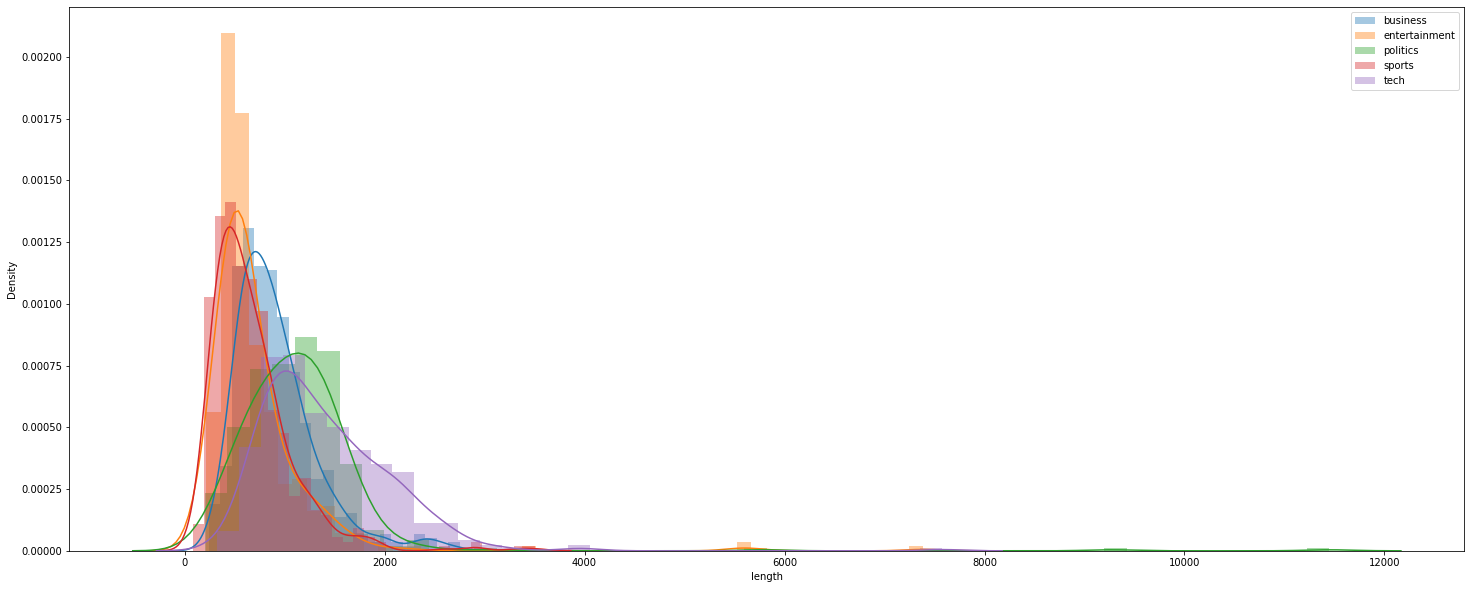

In [ ]:
fig = plt.figure(figsize=(25,10))
sns.distplot(df.loc[df['type'] == 'business', 'length'],label='business')
sns.distplot(df.loc[df['type'] == 'entertainment', 'length'],label='entertainment')
sns.distplot(df.loc[df['type'] == 'politics', 'length'],label='politics')
sns.distplot(df.loc[df['type'] == 'sport', 'length'],label='sports')
sns.distplot(df.loc[df['type'] == 'tech', 'length'],label='tech')

plt.legend()
plt.show()

In [ ]:
word_data=df['news'].str.split().tolist()

In [ ]:
id2word=corpora.Dictionary(word_data)
corpus=[id2word.doc2bow(text) for text in word_data]

In [ ]:
print(corpus[:120])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 3), (21, 1), (22, 2), (23, 3), (24, 3), (25, 2), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 2), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1)], [(10, 1), (12, 1), (13, 2), (14, 1), (18, 2), (22, 1), (24, 2), (26, 2), (47, 3), (61, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 5), (88, 2), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 1), (99, 3), (100, 1

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('10n', 1),
  ('activity', 1),
  ('ahead', 1),
  ('also', 1),
  ('annual', 1),
  ('apparent', 1),
  ('best', 1),
  ('body', 1),
  ('confirm', 1),
  ('continuation', 1),
  ('continue', 1),
  ('early', 1),
  ('economic', 1),
  ('economist', 1),
  ('economy', 2),
  ('end', 1),
  ('eurozone', 1),
  ('fall', 1),
  ('figure', 2),
  ('forecast', 1),
  ('french', 3),
  ('full', 1),
  ('good', 2),
  ('government', 3),
  ('growth', 3),
  ('high', 2),
  ('hit', 1),
  ('improve', 2),
  ('indicator', 1),
  ('industrial', 1),
  ('leave', 1),
  ('look', 1),
  ('make', 1),
  ('month', 1),
  ('noise', 1),
  ('number', 1),
  ('official', 1),
  ('open', 1),
  ('output', 2),
  ('pick', 1),
  ('positive', 2),
  ('predictednndespite', 1),
  ('quarterly', 2),
  ('rebound', 1),
  ('reiterate', 1),
  ('release', 1),
  ('remain', 1),
  ('say', 1),
  ('seasonallyadjuste', 1),
  ('sector', 1),
  ('send', 1),
  ('set', 1),
  ('sevenmonth', 1),
  ('short', 2),
  ('show', 3),
  ('signal', 1),
  ('speed', 1),
  ('s

In [ ]:
import gensim

In [ ]:
lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=5,update_every=1)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,corpus,id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.044104  0.007977       1        1  29.712217
2      0.003336 -0.022177       2        1  25.923334
0      0.014079 -0.007597       3        1  18.610653
4     -0.038702 -0.020554       4        1  17.578872
1     -0.022817  0.042351       5        1   8.174924, topic_info=            Term         Freq        Total Category  logprob  loglift
47           say  6352.000000  6352.000000  Default  30.0000  30.0000
522        music  1031.000000  1031.000000  Default  29.0000  29.0000
1596    software   694.000000   694.000000  Default  28.0000  28.0000
195       people  2899.000000  2899.000000  Default  27.0000  27.0000
459   technology  1753.000000  1753.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
265       market    79.683174   687.160237   Topic5  -5.7561   0.3496
295         take   103.611583  1610.905884   Topic5  -5.4935  -0.2398
33         month    79.456759   741.157272   Topic5  -5.7589   0.2711
533        phone    89.415049  1598.419937   Topic5  -5.6408  -0.3794
65          year    86.379347  1709.442377   Topic5  -5.6754  -0.4811

[472 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
1260       1  0.065231  access
1260       2  0.195692  access
1260       3  0.277231  access
1260       4  0.351780  access
1260       5  0.109495  access
...      ...       ...     ...
65         2  0.358596    year
65         3  0.270849    year
65         4  0.159116    year
65         5  0.050309    year
14276      1  0.987371    zoom

[1129 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 5, 2])

In [ ]:
lsa_model = TruncatedSVD(n_components=5)
lsa_topic_matrix = lsa_model.fit_transform(matrix)

In [ ]:
len(lsa_model.components_)

5

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
        

Topic 0: 
year make also game people take go Topic 1: 
game play win good film player match Topic 2: 
film award include director good star movie Topic 3: 
use people phone technology user mobile software Topic 4: 
election government film party tax leader vote 

In [ ]:
df['target'] = pd.factorize(df['type'])[0] + 1

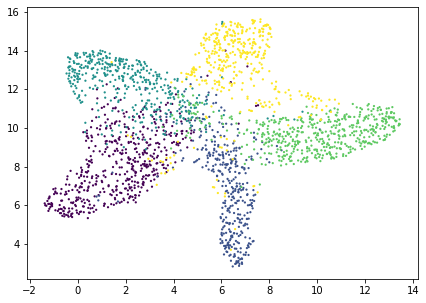

In [ ]:
import umap

X_topics = lsa_model.fit_transform(matrix)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = df.target,s = 5,edgecolor='none')
plt.show()


In [ ]:
df.head()

,news,type,length,target
0,french economy pick speed end official figure ...,business,618,1
1,gap hit record gap export import hit late figu...,business,980,1
2,bindonesian face fuel price government confirm...,business,841,1
3,bhigh fuel price hit blame high fuel price dro...,business,1162,1
4,bsluggish economy hit german number people wor...,business,1106,1


In [ ]:
from gensim.models import Word2Vec

word2vec = Word2Vec(word_data, min_count=2)

In [ ]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'french': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94e80>, 'economy': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94278>, 'pick': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94b38>, 'speed': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94d30>, 'end': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94940>, 'official': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94e48>, 'figure': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94748>, 'show': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94be0>, 'still': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94828>, 'look': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94a90>, 'set': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94b70>, 'fall': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94fd0>, 'short': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa945c0>, 'government': <gensim.models.keyedvectors.Vocab object at 0x7f6b2fa94470>, 'state': <gensi

In [ ]:
sim_words = word2vec.wv.most_similar('tax')
for x in sim_words:
  print(x)

('cut', 0.9967025518417358)
('cost', 0.9901334643363953)
('spending', 0.9854322671890259)
('income', 0.9848159551620483)
('taxi', 0.9814790487289429)
('pay', 0.9805123805999756)
('premium', 0.9792910814285278)
('economic', 0.9792803525924683)
('consumer', 0.9790164232254028)
('net', 0.9787724018096924)


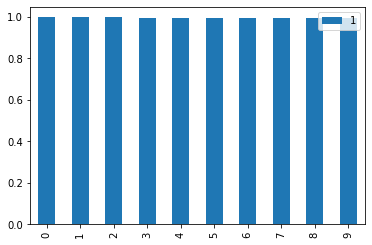

In [ ]:
word=pd.DataFrame(sim_words)
word.plot(kind='bar')